# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#import TrainingCurves
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report,auc,make_scorer,recall_score,roc_auc_score,precision_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from scipy.stats import randint

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# Read Dataset

In [2]:
sat = pd.read_csv('test.csv')

In [3]:
sat.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure_Arrival_time_convenient,...,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [4]:
sat.duplicated().sum()

0

In [5]:
sat.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure_Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On_board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0


In [6]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer_Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type_of_Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight_Distance                    25976 non-null  int64  
 8   Inflight_wifi_service              25976 non-null  int64  
 9   Departure_Arrival_time_convenient  25976 non-null  int64  
 10  Ease_of_Online_booking             25976 non-null  int64  
 11  Gate_location                      25976 non-null  int

In [7]:
sat.dropna(inplace=True)

In [8]:
sat.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure_Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On_board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [9]:
sat.satisfaction.unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

<AxesSubplot:title={'center':'Count (satisfaction)'}>

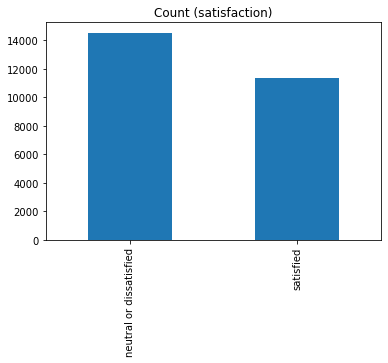

In [10]:
sat['satisfaction'].value_counts().plot(kind='bar',title='Count (satisfaction)')

### Undersample dataset

In [11]:
sat['satisfaction'] = sat['satisfaction'].map({'neutral or dissatisfied': 0,'satisfied': 1})

14528 11365
Random under-sampling:
0    11365
1    11365
Name: satisfaction, dtype: int64


<AxesSubplot:title={'center':'Count (satisfaction)'}>

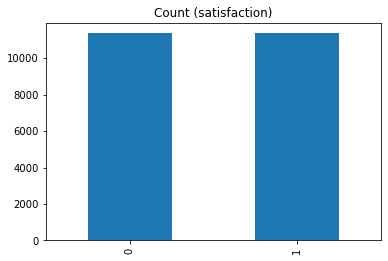

In [12]:
count_class_0, count_class_1 = sat['satisfaction'].value_counts()
print(count_class_0, count_class_1)
class_0 = sat[sat['satisfaction'] == 0]
class_1 = sat[sat['satisfaction'] == 1]

class_0_under = class_0.sample(count_class_1, random_state = 7)

data_under = pd.concat([class_0_under, class_1], axis=0)

print('Random under-sampling:')
print(data_under.satisfaction.value_counts())

data_under.satisfaction.value_counts().plot(kind='bar', title='Count (satisfaction)')

In [13]:
sat.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel',
       'Class', 'Flight_Distance', 'Inflight_wifi_service',
       'Departure_Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On_board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
sat = sat.drop(columns = ['Unnamed: 0','id'])

In [15]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  object 
 1   Customer_Type                      25893 non-null  object 
 2   Age                                25893 non-null  int64  
 3   Type_of_Travel                     25893 non-null  object 
 4   Class                              25893 non-null  object 
 5   Flight_Distance                    25893 non-null  int64  
 6   Inflight_wifi_service              25893 non-null  int64  
 7   Departure_Arrival_time_convenient  25893 non-null  int64  
 8   Ease_of_Online_booking             25893 non-null  int64  
 9   Gate_location                      25893 non-null  int64  
 10  Food_and_drink                     25893 non-null  int64  
 11  Online_boarding                    25893 non-null  int

In [16]:
numerical_features = sat.select_dtypes(include=['float64','int64']).columns.tolist()
numerical_features.remove('satisfaction')
categorical_features = sat.select_dtypes(exclude=['float64','int64']).columns.tolist()

In [17]:
numerical_features

['Age',
 'Flight_Distance',
 'Inflight_wifi_service',
 'Departure_Arrival_time_convenient',
 'Ease_of_Online_booking',
 'Gate_location',
 'Food_and_drink',
 'Online_boarding',
 'Seat_comfort',
 'Inflight_entertainment',
 'On_board_service',
 'Leg_room_service',
 'Baggage_handling',
 'Checkin_service',
 'Inflight_service',
 'Cleanliness',
 'Departure_Delay_in_Minutes',
 'Arrival_Delay_in_Minutes']

In [18]:
categorical_features

['Gender', 'Customer_Type', 'Type_of_Travel', 'Class']

In [19]:
len(numerical_features)

18

In [20]:
len(categorical_features)

4

In [21]:
sat.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [22]:
sat['Gender'] = sat['Gender'].map({'Female': 0,'Male': 1})

In [23]:
sat.Customer_Type.unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [24]:
sat['Customer_Type'] = sat['Customer_Type'].map({'disloyal Customer': 0,'Loyal Customer': 1})

In [25]:
sat.Type_of_Travel.unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [26]:
sat['Type_of_Travel'] = sat['Type_of_Travel'].map({'Personal Travel': 0,'Business travel': 1})

In [27]:
sat.Class.unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [28]:
sat['Class'] = sat['Class'].map({'Eco': 0,'Business': 1, 'Eco Plus': 2})

In [29]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25893 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25893 non-null  int64  
 1   Customer_Type                      25893 non-null  int64  
 2   Age                                25893 non-null  int64  
 3   Type_of_Travel                     25893 non-null  int64  
 4   Class                              25893 non-null  int64  
 5   Flight_Distance                    25893 non-null  int64  
 6   Inflight_wifi_service              25893 non-null  int64  
 7   Departure_Arrival_time_convenient  25893 non-null  int64  
 8   Ease_of_Online_booking             25893 non-null  int64  
 9   Gate_location                      25893 non-null  int64  
 10  Food_and_drink                     25893 non-null  int64  
 11  Online_boarding                    25893 non-null  int

In [30]:
traindata = pd.DataFrame(sat,dtype=np.float)

<ipython-input-30-6c07a6233873>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  traindata = pd.DataFrame(sat,dtype=np.float)


In [31]:
X = sat.drop('satisfaction', axis=1)
y = sat["satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [32]:
# scale the dataset before training 

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
#StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
#scaler = StandardScaler()
#scaler.fit_transform(X_train)
#scaler.fit_transform(X_test)

# Decision Tree

In [95]:
DT_classifier = DecisionTreeClassifier(random_state=7)
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=7)

In [96]:
#training accuracy & f1 & balanced accuracy & recall & precision
DT_train_predict = DT_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, DT_train_predict)
f1_train_predict = f1_score(y_train, DT_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, DT_train_predict)
recall_train_predict = recall_score(y_train, DT_train_predict)
precision_train_predict = precision_score(y_train, DT_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 1.0 
training f1 1.0 
balanced accuracy 1.0 
recall score 1.0 
precision score 1.0 

Training f1_CV
[0.91878712 0.92639321 0.92745355 0.9320357  0.91711818] 
 ave_f1_cv: 0.9243575527780037 

Training precision_CV
[0.90772128 0.91385768 0.91823899 0.9174938  0.90532915] 
 ave_precision_cv: 0.9125281804694041


In [86]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, DT_train_predict))
print(conf_matrix_train)

       0     1
0  10180     0
1      0  7945


In [79]:
def DT_grid_search(X, y):
    param_grid = {'criterion':['gini', 'entropy', 'rbf'], 
                 'max_depth': np.arange(1,20),
                 'min_samples_leaf':np.linspace(1,15,15).astype('int32'),
                 }

    base_estimator = DecisionTreeClassifier(random_state = 7)
    DT_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    DT_gs.fit(X,y)

    return DT_gs

res = DT_grid_search(X_train, y_train)
print('best parameters:', res.best_params_, 'best score:', res.best_score_)

C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\lranc\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 347, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'rbf'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\lranc\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceb

best parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 10} best score: 0.9422896551724138


In [98]:
DT_classifier_1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=12, min_samples_leaf = 10, random_state = 7)
DT_classifier_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=10,
                       random_state=7)

In [99]:
print('Cross Validation Score:' 
     )
print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier_1, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_recall_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
DT_test_predict_1 = DT_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, DT_test_predict_1)
f1_test_predict = f1_score(y_test, DT_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, DT_test_predict_1)
recall_test_predict = recall_score(y_test, DT_test_predict_1)
precision_test_predict = precision_score(y_test, DT_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)



Cross Validation Score:
Training f1_CV
[0.93338558 0.93510949 0.94279904 0.9458165  0.9359377 ] 
 ave_f1_cv: 0.938609661220349 

Training precision_CV
[0.9219238  0.93806452 0.93968254 0.94801027 0.93988365] 
 ave_recall_cv: 0.9375129537560868 

Testing set 
testing accuracy 0.9376930998970134 
testing f1 0.9367830888534668 
balanced accuracy 0.9367285893359587 
recall score 0.928654970760234 
precision score 0.9297423887587822


In [34]:
DT_classifier_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=18, min_samples_leaf = 10, random_state = 7)
DT_classifier_2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, min_samples_leaf=10,
                       random_state=7)

In [35]:
print('\n','Cross Validation Score:', 
     )

print("Training f1_CV")
CVscores_train = cross_val_score(DT_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(DT_classifier_2, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_recall_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
DT_test_predict_2 = DT_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, DT_test_predict_2)
f1_test_predict = f1_score(y_test, DT_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, DT_test_predict_2)
recall_test_predict = recall_score(y_test, DT_test_predict_2)
precision_test_predict = precision_score(y_test, DT_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)




 Cross Validation Score:
Training f1_CV
[0.93709004 0.94042425 0.94440866 0.94501853 0.93921536] 
 ave_f1_cv: 0.9412313689229169 

Training precision_CV
[0.93947199 0.94563107 0.94669236 0.94391332 0.94957433] 
 ave_recall_cv: 0.9450566128182096 

Testing set 
testing accuracy 0.9403964984552008 
testing f1 0.9394622498251533 
balanced accuracy 0.9389562721584703 
recall score 0.9269005847953217 
precision score 0.9370381318356489


In [36]:
best_accuracy = np.zeros(5)
best_f1 = np.zeros(5)
best_precision = np.zeros(5)
best_accuracy[0] = accuracy_score(y_test, DT_test_predict_2)
best_f1[0] = f1_score(y_test, DT_test_predict_2)
best_precision[0] = precision_score(y_test, DT_test_predict_2)
print(best_accuracy, "\n",best_f1,"\n",best_precision)

[0.9403965 0.        0.        0.        0.       ] 
 [0.93194179 0.         0.         0.         0.        ] 
 [0.93703813 0.         0.         0.         0.        ]


## Decision Tree Learning Curve

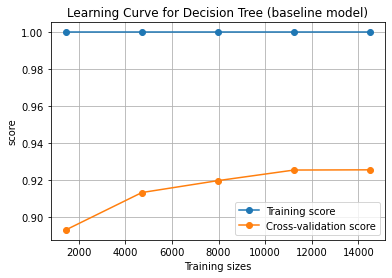

In [91]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=DT_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

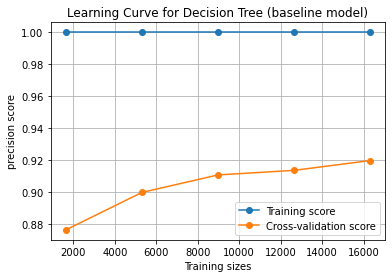

In [102]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=DT_classifier, X=X_train, y=y_train,scoring = scorer, 
                                              train_sizes = train_sizes, cv=10, n_jobs=1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

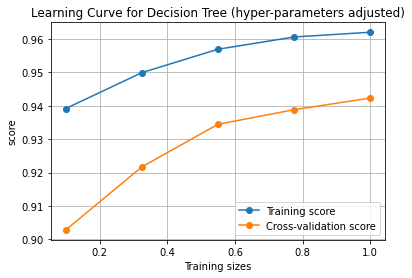

In [94]:
#Accuracy
DT_train_sizes = np.linspace(0.1, 1.0, 5)
DT_train_size, DT_train_scores, DT_test_scores = learning_curve(DT_classifier_2, X_train, y_train,
                                             train_sizes = train_sizes, cv=5, n_jobs=-1,random_state=7)
plt.figure()
plt.plot(DT_train_sizes, np.mean(DT_train_scores, axis=1), 'o-', label='Training score')
plt.plot(DT_train_sizes, np.mean(DT_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

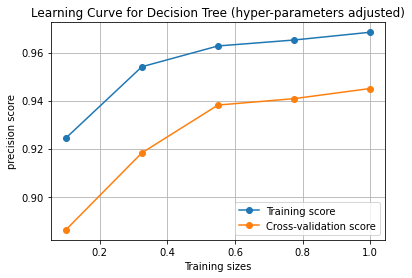

In [104]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_size, train_scores, test_scores = learning_curve(DT_classifier_2, X_train, y_train,scoring = scorer,
                                             train_sizes = train_sizes, cv=5, n_jobs=-1,random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Decision Tree (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Decision Tree Validation Curve

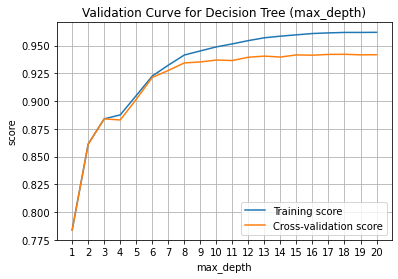

In [97]:
#Accuracy
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(DT_classifier_2, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (max_depth)')
plt.xlabel('max_depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

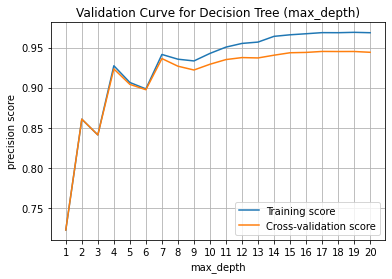

In [105]:
#precision
scorer = make_scorer(precision_score)
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(DT_classifier_2, X_train, y_train, 
                                             param_name="max_depth", param_range=depth_range, 
                                             scoring = scorer,cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (max_depth)')
plt.xlabel('max_depth')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

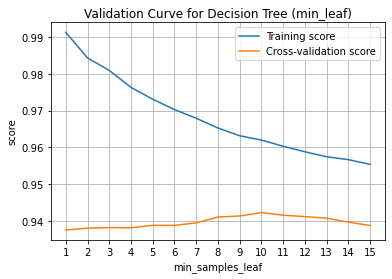

In [99]:
leaf_range = np.arange(15) + 1
train_scores, test_scores = validation_curve(DT_classifier_2, X_train, y_train, param_name="min_samples_leaf", param_range=leaf_range, cv=5)

plt.figure()
plt.xticks(leaf_range)
plt.plot(leaf_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(leaf_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (min_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

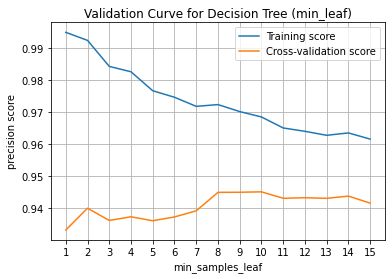

In [106]:
#precision
scorer = make_scorer(precision_score)
leaf_range = np.arange(15) + 1
train_scores, test_scores = validation_curve(DT_classifier_2, X_train, y_train, 
                                             param_name="min_samples_leaf", param_range=leaf_range, 
                                             scoring = scorer,cv=5)

plt.figure()
plt.xticks(leaf_range)
plt.plot(leaf_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(leaf_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Decision Tree (min_leaf)')
plt.xlabel('min_samples_leaf')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

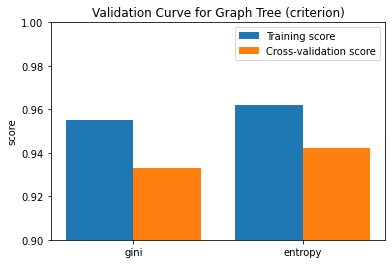

In [64]:
# Validation graph for criterion (accuracy)

criterion = ['gini', 'entropy']
scorer = make_scorer(recall_score)
train_scores, test_scores = validation_curve(DT_classifier_2,X_train, y_train, 
                                             param_name="criterion", param_range=criterion, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

#x = ['gini(Train)','gini(CV)','entropy(Train)','entropy(CV)']
x = ['gini','entropy']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('score')
plt.title('Validation Curve for Graph Tree (criterion)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

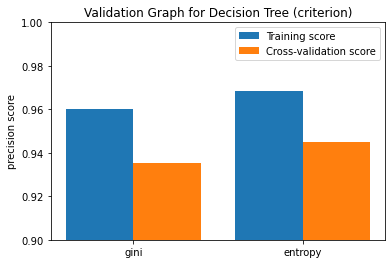

In [107]:
# Validation graph for criterion (precision)
criterion = ['gini', 'entropy']
scorer = make_scorer(precision_score)
train_scores, test_scores = validation_curve(DT_classifier_2,X_train, y_train, 
                                             param_name="criterion", param_range=criterion, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

#x = ['gini(Train)','gini(CV)','entropy(Train)','entropy(CV)']
x = ['gini','entropy']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for Decision Tree (criterion)')
plt.show



# Neural Network

In [109]:
#train the training set
NN_classifier = MLPClassifier(random_state=7)
NN_classifier.fit(X_train,y_train)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=7)

In [111]:
#training accuracy & f1 & balanced accuracy & recall & precision
NN_train_predict = NN_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, NN_train_predict)
f1_train_predict = f1_score(y_train, NN_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, NN_train_predict)
recall_train_predict = recall_score(y_train, NN_train_predict)
precision_train_predict = precision_score(y_train, NN_train_predict)


print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict)

print("Training f1_CV")
CVscores_train = cross_val_score(NN_classifier, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())



Training set 
training accuracy 0.9790896551724138 
training f1 0.9787468254900329 
balanced accuracy 0.9783039338477574 
recall score 0.9719320327249843 
precision score 0.9801980198019802
Training f1_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

[0.93861485 0.94390455 0.94393655 0.94237282 0.93963118] 
 ave_f1_cv: 0.9416919926382799 

Training precision_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9335443  0.94207511 0.93983534 0.92977004 0.94151671] 
 ave_precision_cv: 0.9373483014060751


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [111]:
NNconf_matrix_train = pd.DataFrame(confusion_matrix(y_train, NN_train_predict))
print(NNconf_matrix_train)

       0     1
0  10024   156
1    223  7722


In [68]:
def NN_grid_search(X, y, verbose = 0):
    param_grid = {'hidden_layer_sizes':[(5,),(10,),(20,),(40,), (80,),(150,)], 
                 'learning_rate_init':[0.001, 0.005, 0.010, 0.05, 0.1],
                 'activation':['logistic', 'tanh', 'relu'],
                 }
    
    base_estimator = MLPClassifier(random_state = 7)
    NN_gs = GridSearchCV(base_estimator, param_grid, cv = 5,)
    NN_gs.fit(X,y)

    return NN_gs

NNres = NN_grid_search(X_train, y_train)
print('best parameters:', NNres.best_params_, 'best score:', NNres.best_score_)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (80,), 'learning_rate_init': 0.001} best score: 0.9185103448275862


In [70]:
def NN_grid_search(X, y):
    param_grid = {'hidden_layer_sizes':[(70,),(80,),(90,),(130,),(180,)], 
                 'learning_rate_init':[0.001, 0.010, 0.1],
                  'max_iter':[300, 500, 1000],
                 'activation':['logistic', 'tanh', 'relu'],
                 }
    
    base_estimator = MLPClassifier(random_state = 7)
    NN_gs = GridSearchCV(base_estimator, param_grid, cv = 5,)
    NN_gs.fit(X,y)

    return NN_gs

NNres = NN_grid_search(X_train, y_train)
print('best parameters:', NNres.best_params_, 'best score:', NNres.best_score_)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

best parameters: {'activation': 'logistic', 'hidden_layer_sizes': (180,), 'learning_rate_init': 0.001, 'max_iter': 300} best score: 0.9478068965517241


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [112]:
NN_classifier_1 = MLPClassifier(activation='logistic', hidden_layer_sizes = (80,), learning_rate_init = 0.001,
                               random_state=7)
NN_classifier_1.fit(X_train,y_train)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(80,), random_state=7)

In [113]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(NN_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_1, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_1 = NN_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_1)
f1_test_predict = f1_score(y_test, NN_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_1)
recall_test_predict = recall_score(y_test, NN_test_predict_1)
precision_test_predict = precision_score(y_test, NN_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)


Cross Validation Score:
Training f1_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

[0.94495378 0.94588726 0.94943977 0.94921525 0.94295775] 
 ave_f1_cv: 0.9464907619070105 

Training precision_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.9484868  0.9428934  0.95422308 0.949553   0.94825356] 
 ave_precision_cv: 0.9486819682970751 

Testing set 
testing accuracy 0.9483779608650875 
testing f1 0.9475027350681877 
balanced accuracy 0.9464604281325824 
recall score 0.9304093567251462 
precision score 0.951270553064275


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
NN_classifier_2 = MLPClassifier(activation='logistic', hidden_layer_sizes = (180,), 
                                learning_rate_init = 0.001, max_iter = 300,
                               random_state=7)
NN_classifier_2.fit(X_train,y_train)

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(180,), max_iter=300,
              random_state=7)

In [38]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(NN_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(NN_classifier_2, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
NN_test_predict_2 = NN_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, NN_test_predict_2)
f1_test_predict = f1_score(y_test, NN_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, NN_test_predict_2)
recall_test_predict = recall_score(y_test, NN_test_predict_2)
precision_test_predict = precision_score(y_test, NN_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)


Cross Validation Score:
Training f1_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

[0.94392062 0.94756952 0.95141692 0.94579227 0.94572606] 
 ave_f1_cv: 0.9468850785811653 

Training precision_CV


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[0.94095238 0.94479695 0.95559846 0.94974227 0.95442708] 
 ave_precision_cv: 0.9491034284480255 

Testing set 
testing accuracy 0.946961894953656 
testing f1 0.9461357962231964 
balanced accuracy 0.9456635301839389 
recall score 0.9347953216374268 
precision score 0.9441819255759007


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
best_accuracy[1] = accuracy_score(y_test, NN_test_predict_2)
best_f1[1] = f1_score(y_test, NN_test_predict_2)
best_precision[1] = precision_score(y_test, NN_test_predict_2)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.9403965  0.94696189 0.         0.         0.        ] 
 [0.93194179 0.93946518 0.         0.         0.        ] 
 [0.93703813 0.94418193 0.         0.         0.        ]


## Neural Network Learning Curve

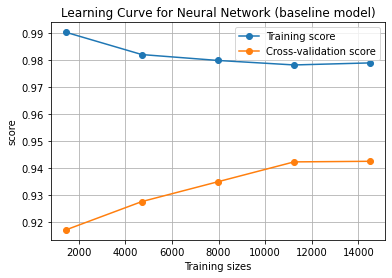

In [110]:
#Accuracy
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier, X=X_train, y=y_train,
                                                        train_sizes = train_sizes, cv=5, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

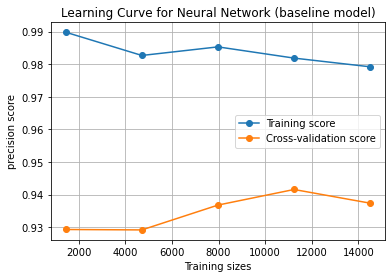

In [118]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier, X=X_train, y=y_train,scoring = scorer,
                                                        train_sizes = train_sizes, cv=5, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

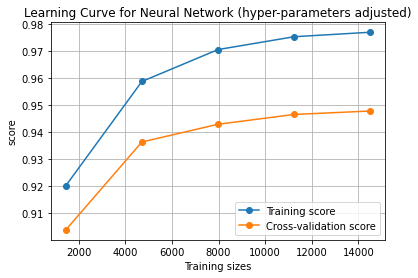

In [82]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier_2, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

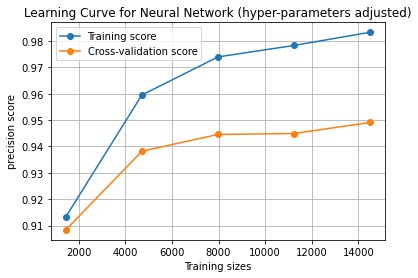

In [119]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=NN_classifier_2, X=X_train, y=y_train, scoring = scorer, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Neural Network (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Neural Network Validation Curve

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

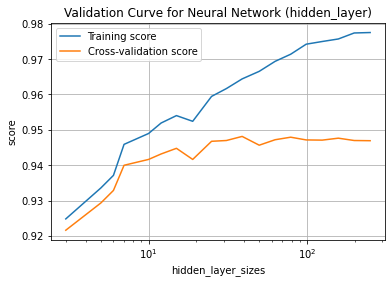

In [84]:
#Accuracy
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]

train_scores, test_scores = validation_curve(NN_classifier_2, 
                                             X_train, y_train, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=range_list, cv=5)

plt.figure()
plt.semilogx(range_list, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(range_list, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (hidden_layer)')
plt.xlabel('hidden_layer_sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

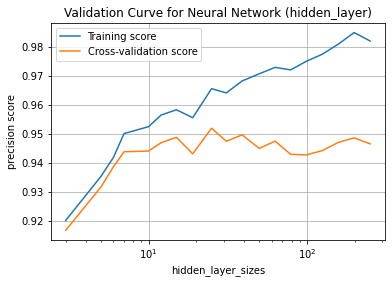

In [120]:
# precision
scorer = make_scorer(precision_score)
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size = arr.astype('int32')
range_list = [(v,) for v in variable_layers_size]

train_scores, test_scores = validation_curve(NN_classifier_2, 
                                             X_train, y_train,scoring = scorer,
                                             param_name="hidden_layer_sizes", 
                                             param_range=range_list, cv=5)

plt.figure()
plt.semilogx(range_list, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(range_list, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (hidden_layer)')
plt.xlabel('hidden_layer_sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

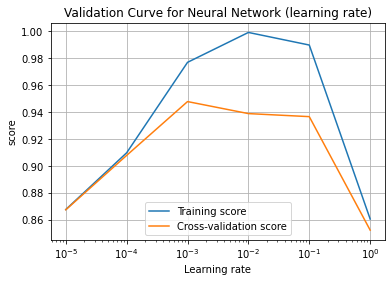

In [86]:
# Accuracy
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_classifier_2, X_train, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.xticks(lr_range)
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (learning rate)')
plt.xlabel('Learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

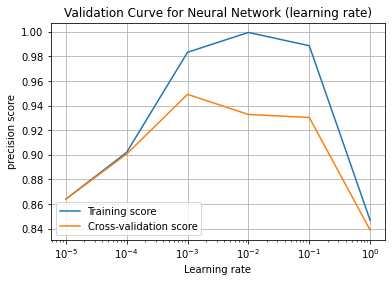

In [121]:
#precision
scorer = make_scorer(precision_score)
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="learning_rate_init", 
                                             param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for Neural Network (learning rate)')
plt.xlabel('Learning rate')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

<function matplotlib.pyplot.show(close=None, block=None)>

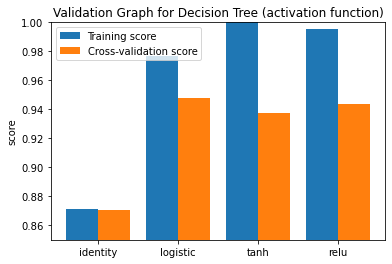

In [88]:
# Validation graph for activation (accuracy)

activation = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(NN_classifier_2,X_train, y_train, 
                                             param_name="activation", param_range=activation, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['identity', 'logistic', 'tanh', 'relu']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.85, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for Decision Tree (activation function)')
plt.show



D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

<function matplotlib.pyplot.show(close=None, block=None)>

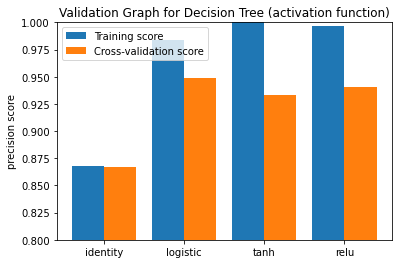

In [122]:
# Validation graph for activation (precision)
scorer = make_scorer(precision_score)
activation = ['identity', 'logistic', 'tanh', 'relu']
train_scores, test_scores = validation_curve(NN_classifier_2,X_train, y_train, 
                                             param_name="activation", param_range=activation, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['identity', 'logistic', 'tanh', 'relu']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.8, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for Decision Tree (activation function)')
plt.show



## Neural Network Iteration Graph 

Text(0.5, 1.0, 'Neural Network Iteration Curve')

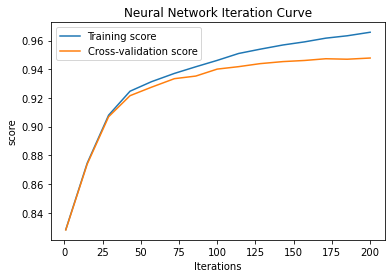

In [90]:
## Plot iterations for NN
range_list = np.linspace(1, 200, 15).astype('int32')

train_scores, test_scores  = validation_curve(
    NN_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iteration Curve')

Text(0.5, 1.0, 'Neural Network Iteration Curve')

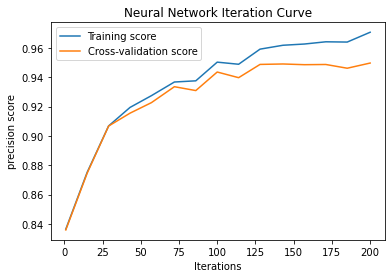

In [123]:
### Plot iterations for NN
scorer = make_scorer(precision_score, pos_label=1)
range_list = np.linspace(1, 200, 15).astype('int32')

train_scores, test_scores = validation_curve(
    NN_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    scoring=scorer, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel("precision score"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iteration Curve')

# Boosting

In [124]:
#start with the best case of DT
dummy_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=12, min_samples_leaf = 10, random_state = 7)
BST_classifier = AdaBoostClassifier(dummy_tree, random_state=7)
#GradientBoostingClassifier(random_state=7)
BST_classifier.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=12,
                                                         min_samples_leaf=10,
                                                         random_state=7),
                   random_state=7)

In [125]:
#training accuracy & f1 & balanced accuracy & recall & precision
BST_train_predict = BST_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, BST_train_predict)
f1_train_predict = f1_score(y_train, BST_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, BST_train_predict)
recall_train_predict = recall_score(y_train, BST_train_predict)
precision_train_predict = precision_score(y_train, BST_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict, '\n')

print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 1.0 
training f1 1.0 
balanced accuracy 1.0 
recall score 1.0 
precision score 1.0 

Training f1_CV
[0.93675653 0.93440534 0.93467117 0.93821343 0.93310303] 
 ave_f1_cv: 0.9354298993658461 

Training precision_CV
[0.94228275 0.94546649 0.94667544 0.94075982 0.95369128] 
 ave_precision_cv: 0.9457751560754468


In [77]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, BST_train_predict))
print(conf_matrix_train)

       0     1
0  10180     0
1      0  7945


In [73]:
def BST_grid_search(X, y):
    param_grid = {'n_estimators': np.linspace(10,200,3).round().astype('int'), 
                 'learning_rate': [0.05, 0.1, 0.15, 0.18, 0.2],
                 }
    
    base_estimator = AdaBoostClassifier(dummy_tree, random_state=7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    BST_gs.fit(X,y)

    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)


best parameters: {'learning_rate': 0.05, 'n_estimators': 10} best score: 0.9510068965517242


In [75]:
def BST_grid_search(X, y):
    param_grid = {'n_estimators': np.linspace(10,200,3).round().astype('int'), 
                 'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1]
                 }
    
    base_estimator = AdaBoostClassifier(dummy_tree, random_state=7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    BST_gs.fit(X,y)

    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)

best parameters: {'learning_rate': 0.01, 'n_estimators': 105} best score: 0.9521103448275863


In [82]:
def BST_grid_search(X, y, verbose = 0):
    param_grid = {'n_estimators': np.linspace(10,200,3).round().astype('int'), 
                 'max_depth': list(range(1,20)),
                 'learning_rate': [0.001,0.05, 0.1],
                 }
    
    base_estimator = GradientBoostingClassifier(random_state = 7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    BST_gs.fit(X,y)

    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)


best parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200} best score: 0.957351724137931


In [70]:
def BST_grid_search(X, y, verbose = 0):
    param_grid = {'n_estimators': np.linspace(10,200,3).round().astype('int'), 
                 'max_depth': list(range(1,20)),
                 'learning_rate': [0.05, 0.1, 0.15],
                 }
    
    base_estimator = GradientBoostingClassifier(random_state = 7)
    BST_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    BST_gs.fit(X,y)

    return BST_gs

BSTres = BST_grid_search(X_train, y_train)
print('best parameters:', BSTres.best_params_, 'best score:', BSTres.best_score_)


best parameters: {'learning_rate': 0.15, 'max_depth': 7, 'n_estimators': 105} best score: 0.9574620689655173


In [40]:
BST_classifier_1 = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 8, n_estimators = 200, random_state=7)
BST_classifier_1.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=8, n_estimators=200, random_state=7)

In [41]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_1, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_1 = BST_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_1)
f1_test_predict = f1_score(y_test, BST_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_1)
recall_test_predict = recall_score(y_test, BST_test_predict_1)
precision_test_predict = precision_score(y_test, BST_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)



Cross Validation Score:
Training f1_CV
[0.95447513 0.95789779 0.95762023 0.95844688 0.95471781] 
 ave_f1_cv: 0.9566315682610596 

Training precision_CV
[0.9618123  0.96092249 0.9603073  0.96274888 0.9654498 ] 
 ave_precision_cv: 0.9622481524265574 

Testing set 
testing accuracy 0.958934088568486 
testing f1 0.9582350098637663 
balanced accuracy 0.9571381881566843 
recall score 0.9421052631578948 
precision score 0.9638049655997607


In [128]:
BST_classifier_2 = GradientBoostingClassifier(learning_rate = 0.15, max_depth = 7, n_estimators = 105, random_state=7)
BST_classifier_2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, max_depth=7, n_estimators=105,
                           random_state=7)

In [129]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_2, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_2 = BST_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_2)
f1_test_predict = f1_score(y_test, BST_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_2)
recall_test_predict = recall_score(y_test, BST_test_predict_2)
precision_test_predict = precision_score(y_test, BST_test_predict_2)


print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)



Cross Validation Score:
Training f1_CV
[0.95358554 0.95789779 0.95899619 0.95758239 0.95531478] 
 ave_f1_cv: 0.9566753390170005 

Training precision_CV
[0.96475196 0.96092249 0.96458467 0.96387097 0.9630829 ] 
 ave_precision_cv: 0.9634425975859939 

Testing set 
testing accuracy 0.9577754891864058 
testing f1 0.9570954043540039 
balanced accuracy 0.9563840604270566 
recall score 0.9447368421052632 
precision score 0.9587537091988131


In [130]:
BST_classifier_3 = AdaBoostClassifier(learning_rate = 0.05, n_estimators = 10, random_state=7)
BST_classifier_3.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.05, n_estimators=10, random_state=7)

In [131]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_3, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_3, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_3 = BST_classifier_3.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_3)
f1_test_predict = f1_score(y_test, BST_test_predict_3,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_3)
recall_test_predict = recall_score(y_test, BST_test_predict_3)
precision_test_predict = precision_score(y_test, BST_test_predict_3)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.77701068 0.83885251 0.8254311  0.84590116 0.83955392 0.83914114
 0.76528956 0.84560076 0.77390785 0.84661919] 
 ave_f1_cv: 0.8197307881349284 

Training precision_CV
[0.7139738  0.85734266 0.83772538 0.85080645 0.84573748 0.86036671
 0.70152505 0.86452514 0.71396896 0.86797753] 
 ave_precision_cv: 0.8113949166355712 

Testing set 
testing accuracy 0.8392121524201854 
testing f1 0.8351115856765599 
balanced accuracy 0.8322504936059868 
recall score 0.7739766081871345 
precision score 0.8475824527697726


In [133]:
BST_classifier_4 = AdaBoostClassifier(learning_rate = 0.01, n_estimators = 105, random_state=7)
BST_classifier_4.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=105, random_state=7)

In [134]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(BST_classifier_4, X_train, y_train,
                         scoring="f1_macro", cv=10)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(BST_classifier_4, X_train, y_train,
                         scoring=scorer, cv=10)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')


#testing accuracy & f1 & balanced accuracy & recall & precision
BST_test_predict_4 = BST_classifier_4.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, BST_test_predict_4)
f1_test_predict = f1_score(y_test, BST_test_predict_4,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, BST_test_predict_4)
recall_test_predict = recall_score(y_test, BST_test_predict_4)
precision_test_predict = precision_score(y_test, BST_test_predict_4)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.84147584 0.83885251 0.82961745 0.84826181 0.84192288 0.84033966
 0.83371164 0.85214698 0.83515237 0.84721653] 
 ave_f1_cv: 0.8408697681295297 

Training precision_CV
[0.85419532 0.85734266 0.83928571 0.85160428 0.84656797 0.86075949
 0.84937238 0.86657497 0.84594223 0.86816269] 
 ave_precision_cv: 0.8539807706050955 

Testing set 
testing accuracy 0.8406282183316169 
testing f1 0.8366382512422532 
balanced accuracy 0.8338586807404897 
recall score 0.7771929824561403 
precision score 0.8481174218251436


In [42]:
best_accuracy[2] = accuracy_score(y_test, BST_test_predict_1)
best_f1[2] = f1_score(y_test, BST_test_predict_1)
best_precision[2] = precision_score(y_test, BST_test_predict_1)
print(best_accuracy, "\n",best_f1,"\n",best_precision)

[0.9403965  0.94696189 0.95893409 0.         0.        ] 
 [0.93194179 0.93946518 0.95283158 0.         0.        ] 
 [0.93703813 0.94418193 0.96380497 0.         0.        ]


## Boosting Learning Curve

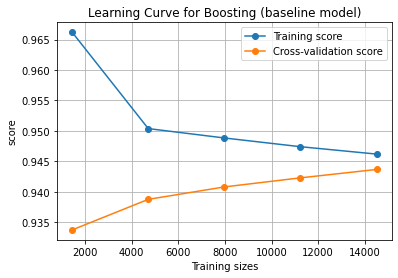

In [86]:
#Accuracy
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier, X=X_train, y=y_train,
                                                        train_sizes = train_sizes, cv=5, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Boosting (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

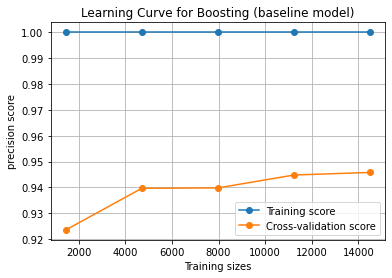

In [136]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier, X=X_train, y=y_train,scoring = scorer, 
                                                        train_sizes = train_sizes, cv=5, n_jobs=-1, random_state=7)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for Boosting (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

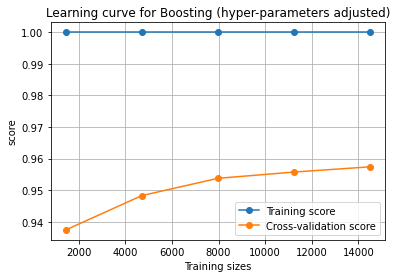

In [82]:
#Accuracy
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier_1, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for Boosting (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

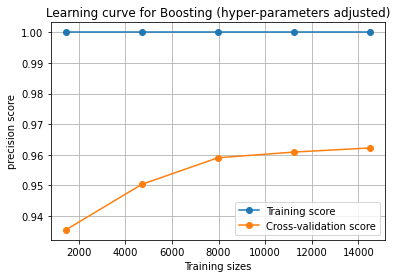

In [137]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=BST_classifier_1, X=X_train, y=y_train,scoring = scorer, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for Boosting (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## Boosting Validation Curve

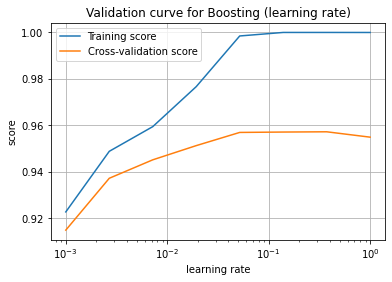

In [88]:
#Accuracy
param_range = np.logspace(-3, 0, 8)
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train, 
                                             param_name="learning_rate", param_range=param_range, cv=5)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (learning rate)')
plt.xlabel('learning rate')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

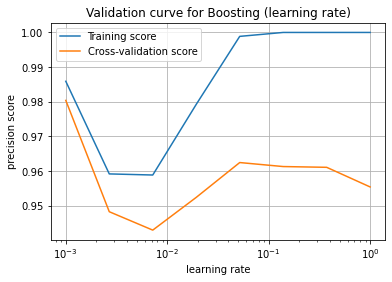

In [138]:
#precision
scorer = make_scorer(precision_score)
param_range = np.logspace(-3, 0, 8)
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train,scoring = scorer, 
                                             param_name="learning_rate", param_range=param_range, cv=5)

plt.figure()
plt.semilogx(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (learning rate)')
plt.xlabel('learning rate')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tra

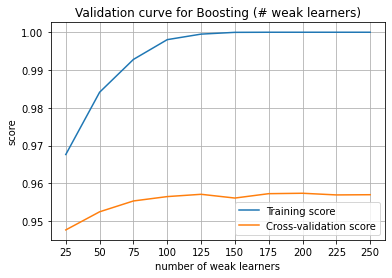

In [89]:
#Accuracy
param_range = np.linspace(0, 250, 11).astype('int32') 
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train, 
                                             param_name="n_estimators", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (# weak learners)')
plt.xlabel('number of weak learners')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "D:\Program Files\miniconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
D:\Program Files\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this tra

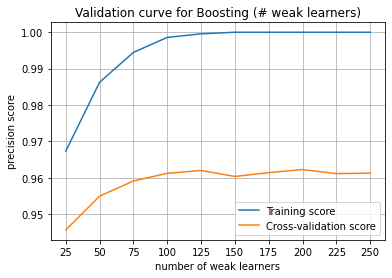

In [139]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(0, 250, 11).astype('int32') 
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="n_estimators", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (# weak learners)')
plt.xlabel('number of weak learners')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

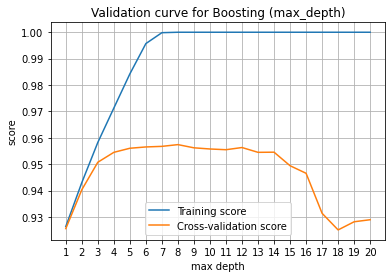

In [88]:
# Accuracy
param_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train, 
                                             param_name="max_depth", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (max_depth)')
plt.xlabel('max depth')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

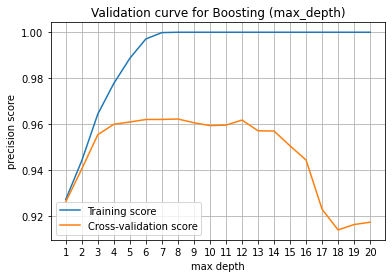

In [140]:
# precision 
scorer = make_scorer(precision_score)
param_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(BST_classifier_1, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="max_depth", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for Boosting (max_depth)')
plt.xlabel('max depth')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

# Support Vector Machine

In [141]:
SVM_classifier = SVC(random_state=7)
SVM_classifier.fit(X_train,y_train)

SVC(random_state=7)

In [142]:
#training accuracy & f1 & balanced accuracy & recall & precision
SVM_train_predict = SVM_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, SVM_train_predict)
f1_train_predict = f1_score(y_train, SVM_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, SVM_train_predict)
recall_train_predict = recall_score(y_train, SVM_train_predict)
precision_train_predict = precision_score(y_train, SVM_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())

Training set 
training accuracy 0.9547034482758621 
training f1 0.9538826798805751 
balanced accuracy 0.9527398272257328 
recall score 0.9368156073001888 
precision score 0.958902344756506 

Training f1_CV
[0.93900519 0.93989852 0.94128067 0.94523873 0.93930018] 
 ave_f1_cv: 0.9409446577988181 

Training precision_CV
[0.94487678 0.94269156 0.94573643 0.94851995 0.94433657] 
 ave_precision_cv: 0.9452322600638812


In [92]:
conf_matrix_train = pd.DataFrame(confusion_matrix(y_train, SVM_train_predict))
print(conf_matrix_train)

      0     1
0  9861   319
1   502  7443


In [104]:
#grid search
def SVM_grid_search(X, y):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.25/X_train.shape[1], 0.5/X_train.shape[1], 0.75/X_train.shape[1]], 
                  'C': [1.0, 3.0, 5.0, 10.0, 100.0]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5,)
    SVM_gs.fit(X,y)

    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)


best parameters: {'C': 10.0, 'gamma': 0.03409090909090909, 'kernel': 'rbf'} best score: 0.9463724137931034


In [105]:
#grid search
def SVM_grid_search(X, y):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.025, 0.03, 0.035, 0.04, 0.045], 
                  'C': [5.0, 8.0, 10.0, 15.0, 20.0, 50.0]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5,)
    SVM_gs.fit(X,y)

    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)

best parameters: {'C': 5.0, 'gamma': 0.045, 'kernel': 'rbf'} best score: 0.9473103448275861


In [93]:
#grid search
def SVM_grid_search(X, y):
    param_grid = {'kernel': ['linear', 'poly', 'rbf'], 
                  'gamma':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06], 
                  'C': [5.0, 13.0, 13.5, 14.0, 20.0],
                  'max_iter':[300, 500, 1000]
                 }
    
    base_estimator = SVC(random_state = 7)
    SVM_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    SVM_gs.fit(X,y)

    return SVM_gs

SVMres = SVM_grid_search(X_train, y_train)
print('best parameters:', SVMres.best_params_, 'best score:', SVMres.best_score_)


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.wa

best parameters: {'C': 5.0, 'gamma': 0.05, 'kernel': 'rbf', 'max_iter': 1000} best score: 0.9261241379310345


D:\Program Files\miniconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


In [143]:
SVM_classifier_1 = SVC(C = 10, kernel = 'rbf', gamma = 0.03409090909090909, random_state=7)
SVM_classifier_1.fit(X_train,y_train)

SVC(C=10, gamma=0.03409090909090909, random_state=7)

In [144]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier_1, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
SVM_test_predict_1 = SVM_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, SVM_test_predict_1)
f1_test_predict = f1_score(y_test, SVM_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, SVM_test_predict_1)
recall_test_predict = recall_score(y_test, SVM_test_predict_1)
precision_test_predict = precision_score(y_test, SVM_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.94294906 0.94411542 0.94606909 0.95034478 0.9435283 ] 
 ave_f1_cv: 0.9454013292608991 

Training precision_CV
[0.9488342  0.94723295 0.95035461 0.9502551  0.94832041] 
 ave_precision_cv: 0.9489994539061453 

Testing set 
testing accuracy 0.9468331616889805 
testing f1 0.9459244173576373 
balanced accuracy 0.9448308558885714 
recall score 0.9280701754385965 
precision score 0.9500149655791679


In [43]:
SVM_classifier_2 = SVC(C = 5, kernel = 'rbf', gamma = 0.045, random_state=7)
SVM_classifier_2.fit(X_train,y_train)

SVC(C=5, gamma=0.045, random_state=7)

In [44]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(SVM_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(SVM_classifier_2, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
SVM_test_predict_2 = SVM_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, SVM_test_predict_2)
f1_test_predict = f1_score(y_test, SVM_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, SVM_test_predict_2)
recall_test_predict = recall_score(y_test, SVM_test_predict_2)
precision_test_predict = precision_score(y_test, SVM_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.94490369 0.94409865 0.94633784 0.95061455 0.94577593] 
 ave_f1_cv: 0.9463461315563627 

Training precision_CV
[0.95197923 0.9483871  0.95155039 0.9514377  0.95090439] 
 ave_precision_cv: 0.9508517622159853 

Testing set 
testing accuracy 0.946961894953656 
testing f1 0.9460571812594375 
balanced accuracy 0.9449770547189809 
recall score 0.9283625730994152 
precision score 0.9500299222022741


In [45]:
best_accuracy[3] = accuracy_score(y_test, SVM_test_predict_2)
best_f1[3] = f1_score(y_test, SVM_test_predict_2)
best_precision[3] = precision_score(y_test, SVM_test_predict_2)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.9403965  0.94696189 0.95893409 0.94696189 0.        ] 
 [0.93194179 0.93946518 0.95283158 0.93907128 0.        ] 
 [0.93703813 0.94418193 0.96380497 0.95002992 0.        ]


## SVM Learning Curve

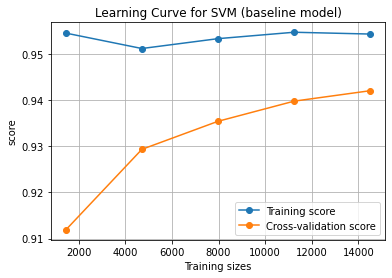

In [129]:
#Accuracy
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

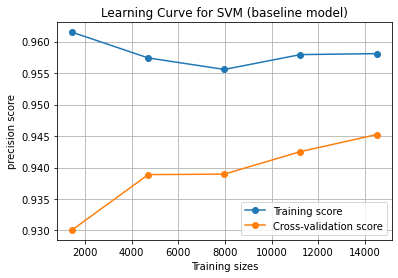

In [148]:
#precision
scorer = make_scorer(precision_score)
#train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

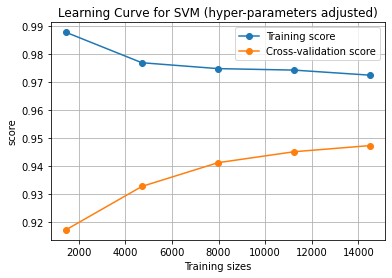

In [130]:
#Accuracy 
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier_2, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

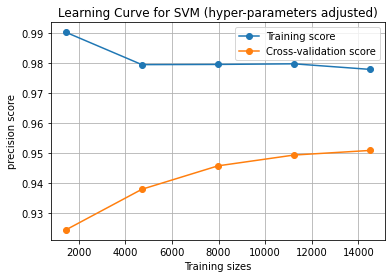

In [149]:
#precision
scorer = make_scorer(precision_score)
train_sizes, train_scores, test_scores = learning_curve(estimator=SVM_classifier_2, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for SVM (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## SVM Validation Curve

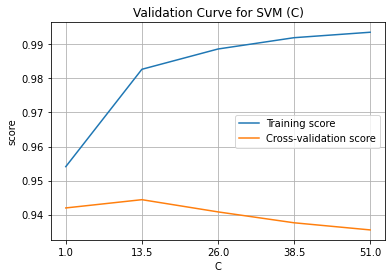

In [116]:
#Accuracy
param_range = np.linspace(0, 50, 5)+1
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, 
                                             param_name="C", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (C)')
plt.xlabel('C')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

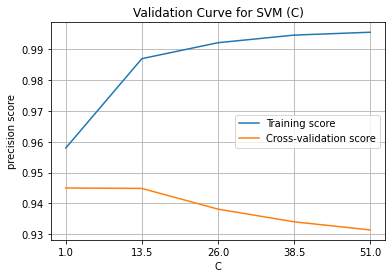

In [150]:
#precision 
scorer = make_scorer(precision_score)
param_range = np.linspace(0, 50, 5) +1
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="C", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (C)')
plt.xlabel('C')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

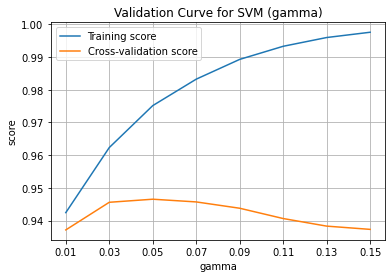

In [106]:
#Accuracy
param_range = np.linspace(0.01, 0.15, 8) 
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, 
                                             param_name="gamma", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (gamma)')
plt.xlabel('gamma')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

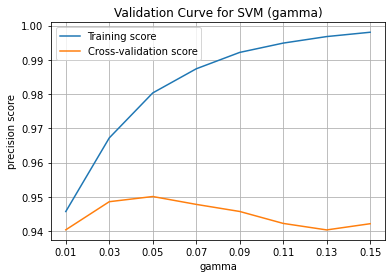

In [151]:
#precision 
scorer = make_scorer(precision_score)
param_range = np.linspace(0.01, 0.15, 8) 
train_scores, test_scores = validation_curve(SVM_classifier_2, 
                                             X_train, y_train, scoring = scorer, 
                                             param_name="gamma", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for SVM (gamma)')
plt.xlabel('gamma')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

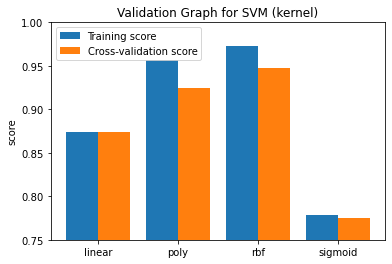

In [113]:
# Validation graph for kernel (accuracy)

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(SVM_classifier_2,X_train, y_train, 
                                             param_name="kernel", param_range=kernel, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['linear', 'poly', 'rbf', 'sigmoid']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.75, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for SVM (kernel)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

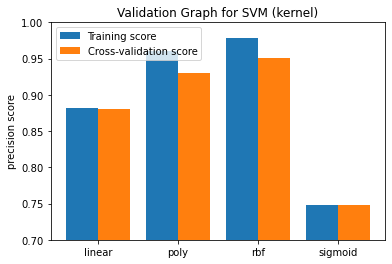

In [152]:
# Validation graph for kernel (precision)
scorer = make_scorer(precision_score)
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
train_scores, test_scores = validation_curve(SVM_classifier_2,X_train, y_train, 
                                             param_name="kernel", param_range=kernel, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1],
       train_scores_mean[2], test_scores_mean[2], train_scores_mean[3],  test_scores_mean[3]]

x = ['linear', 'poly', 'rbf', 'sigmoid']
data_train = [train_scores_mean[0],train_scores_mean[1],train_scores_mean[2],train_scores_mean[3]]
data_test = [test_scores_mean[0],test_scores_mean[1],test_scores_mean[2],test_scores_mean[3]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.7, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for SVM (kernel)')
plt.show



## SVM Iteration Curve

Text(0.5, 1.0, 'SVM Iteration Curve')

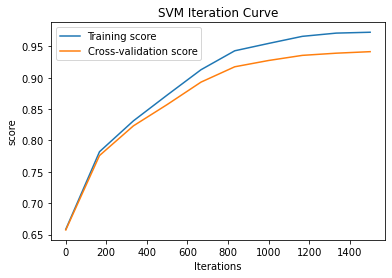

In [163]:
## Plot iterations for SVM
range_list = np.linspace(1, 1500, 10).astype('int32')

train_scores, test_scores = validation_curve(
    SVM_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel('score'); axs.set_xlabel("Iterations")
axs.set_title('SVM Iteration Curve')

Text(0.5, 1.0, 'SVM Iteration Curve')

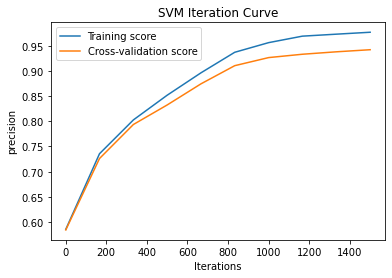

In [164]:
## Plot iterations for SVM (precision)
scorer = make_scorer(precision_score, pos_label=1)
range_list = np.linspace(1, 1500, 10).astype('int32')

train_scores, test_scores = validation_curve(
    SVM_classifier_2, X_train, y_train, param_name="max_iter", param_range=range_list,
    scoring=scorer, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Training score')
axs.plot(df_1['x'], df_1['test'], label='Cross-validation score')
axs.legend(); axs.set_ylabel('precision'); axs.set_xlabel("Iterations")
axs.set_title('SVM Iteration Curve')

# KNN

In [34]:
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [166]:
#training accuracy & f1 & balanced accuracy & recall & precision
KNN_train_predict = KNN_classifier.predict(X_train)
accuracy_train_predict = accuracy_score(y_train, KNN_train_predict)
f1_train_predict = f1_score(y_train, KNN_train_predict,average='macro')
baccu_train_predict = balanced_accuracy_score(y_train, KNN_train_predict)
recall_train_predict = recall_score(y_train, KNN_train_predict)
precision_train_predict = precision_score(y_train, KNN_train_predict)

print('Training set','\n'
      'training accuracy', accuracy_train_predict, '\n'
      'training f1',  f1_train_predict,'\n'
     'balanced accuracy', baccu_train_predict,'\n'
     'recall score', recall_train_predict,'\n'
     'precision score', precision_train_predict,'\n')

print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean())


Training set 
training accuracy 0.9408551724137931 
training f1 0.9395139368605941 
balanced accuracy 0.9367364778233459 
recall score 0.903335431088735 
precision score 0.9593637214276166 

Training f1_CV
[0.91056159 0.91660187 0.91267461 0.90807192 0.90615001] 
 ave_f1_cv: 0.9108119976218758 

Training precision_CV
[0.93625771 0.93953804 0.93360434 0.93110505 0.92668024] 
 ave_precision_cv: 0.9334370764861157


In [137]:
KNNconf_matrix_train = pd.DataFrame(confusion_matrix(y_train, KNN_train_predict))
print(KNNconf_matrix_train)

      0     1
0  9876   304
1   768  7177


In [138]:
#grid search
def KNN_grid_search(X, y):
    param_grid = {'n_neighbors': np.linspace(1,20,20).astype('int32'), 
                  'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'], 
                  'leaf_size': np.linspace(5,50,10).astype('int32')
                 }
    
    base_estimator = KNeighborsClassifier()
    KNN_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    KNN_gs.fit(X,y)

    return KNN_gs

KNNres = KNN_grid_search(X_train, y_train)
print('best parameters:', KNNres.best_params_, 'best score:', KNNres.best_score_)


best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 9} best score: 0.9137655172413794


In [57]:

#grid search
def KNN_grid_search(X, y):
    param_grid = {'n_neighbors': np.linspace(1,20,20).astype('int32'), 
                  'weights':['uniform', 'distance']
                 }
    
    base_estimator = KNeighborsClassifier()
    KNN_gs = GridSearchCV(base_estimator, param_grid, cv = 5)
    KNN_gs.fit(X,y)

    return KNN_gs

KNNres = KNN_grid_search(X_train, y_train)
print('best parameters:', KNNres.best_params_, 'best score:', KNNres.best_score_)


best parameters: {'n_neighbors': 6, 'weights': 'distance'} best score: 0.9153655172413794


In [35]:
KNN_classifier_1 = KNeighborsClassifier(n_neighbors = 9, algorithm = 'auto', leaf_size = 5)
KNN_classifier_1.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=5, n_neighbors=9)

In [168]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_1, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_1, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_1 = KNN_classifier_1.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_1)
f1_test_predict = f1_score(y_test, KNN_test_predict_1,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_1)
recall_test_predict = recall_score(y_test, KNN_test_predict_1)
precision_test_predict = precision_score(y_test, KNN_test_predict_1)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.91366716 0.91213135 0.91377481 0.91392685 0.90399091] 
 ave_f1_cv: 0.9114982180412039 

Training precision_CV
[0.94032922 0.94317394 0.9361413  0.94158076 0.93044077] 
 ave_precision_cv: 0.9383331985984746 

Testing set 
testing accuracy 0.9164521112255407 
testing f1 0.914212921483098 
balanced accuracy 0.910140711330611 
recall score 0.8573099415204678 
precision score 0.9479469770449402


In [46]:
KNN_classifier_2 = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
KNN_classifier_2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [47]:
print('Cross Validation Score:'
     )
print("Training f1_CV")
CVscores_train = cross_val_score(KNN_classifier_2, X_train, y_train,
                         scoring="f1_macro", cv=5)
print(CVscores_train,"\n", "ave_f1_cv:", CVscores_train.mean(), '\n')

print("Training precision_CV")
scorer = make_scorer(precision_score)
CVscores_train = cross_val_score(KNN_classifier_2, X_train, y_train,
                         scoring=scorer, cv=5)
print(CVscores_train,"\n", "ave_precision_cv:", CVscores_train.mean(), '\n')

#testing accuracy & f1 & balanced accuracy & recall & precision
KNN_test_predict_2 = KNN_classifier_2.predict(X_test)
accuracy_test_predict = accuracy_score(y_test, KNN_test_predict_2)
f1_test_predict = f1_score(y_test, KNN_test_predict_2,average='macro')
baccu_test_predict = balanced_accuracy_score(y_test, KNN_test_predict_2)
recall_test_predict = recall_score(y_test, KNN_test_predict_2)
precision_test_predict = precision_score(y_test, KNN_test_predict_2)

print(
      'Testing set','\n'
      'testing accuracy', accuracy_test_predict, '\n'
      'testing f1',  f1_test_predict,'\n'
     'balanced accuracy', baccu_test_predict,'\n'
     'recall score', recall_test_predict,'\n'
     'precision score', precision_test_predict)

Cross Validation Score:
Training f1_CV
[0.91363587 0.91550067 0.9161528  0.91111161 0.90980103] 
 ave_f1_cv: 0.9132403967744105 

Training precision_CV
[0.94154058 0.93699187 0.93413978 0.9375429  0.93197279] 
 ave_precision_cv: 0.9364375836119228 

Testing set 
testing accuracy 0.916323377960865 
testing f1 0.9142284840932671 
balanced accuracy 0.9106497845349344 
recall score 0.8631578947368421 
precision score 0.9419272495213784


In [48]:
best_accuracy[4] = accuracy_score(y_test, KNN_test_predict_2)
best_f1[4] = f1_score(y_test, KNN_test_predict_2)
best_precision[4] = precision_score(y_test, KNN_test_predict_2)
print(best_accuracy, "\n",best_f1, "\n",best_precision)

[0.9403965  0.94696189 0.95893409 0.94696189 0.91632338] 
 [0.93194179 0.93946518 0.95283158 0.93907128 0.90082392] 
 [0.93703813 0.94418193 0.96380497 0.95002992 0.94192725]


## KNN Learning curve

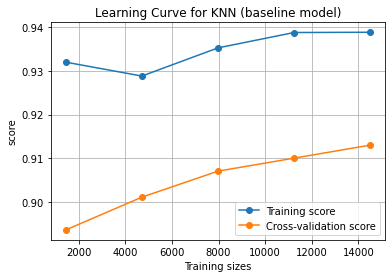

In [36]:
#Accuracy
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=KNN_classifier, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for KNN (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

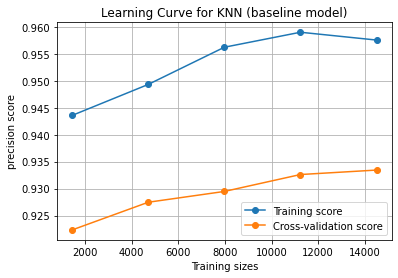

In [36]:
#precision
scorer = make_scorer(precision_score)
train_sizes = np.linspace(0.1, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(estimator=KNN_classifier, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning Curve for KNN (baseline model)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

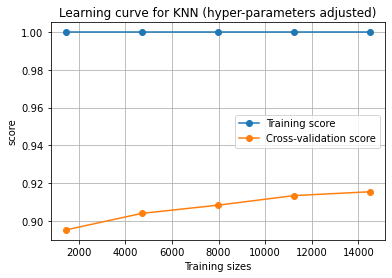

In [44]:
#Accuracy
train_sizes, train_scores, test_scores = learning_curve(estimator=KNN_classifier_2, X=X_train, y=y_train, 
                                              train_sizes = train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for KNN (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

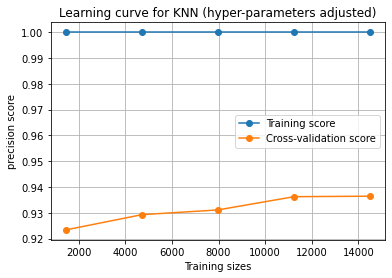

In [37]:
#precision
scorer = make_scorer(precision_score)
KNN_train_sizes = np.linspace(0.1, 1.0, 5)
KNN_train_sizes, KNN_train_scores, KNN_test_scores = learning_curve(estimator=KNN_classifier_2, X=X_train, y=y_train, 
                                              scoring = scorer,train_sizes = KNN_train_sizes, cv=5, n_jobs=-1)
plt.figure()
plt.plot(KNN_train_sizes, np.mean(KNN_train_scores, axis=1), 'o-', label='Training score')
plt.plot(KNN_train_sizes, np.mean(KNN_test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for KNN (hyper-parameters adjusted)')
plt.xlabel('Training sizes')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

## KNN Validation Curve

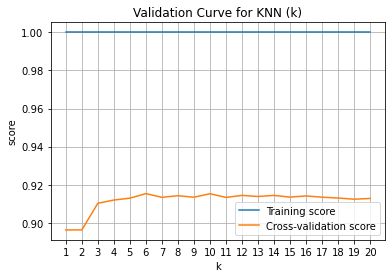

In [46]:
#Accuracy
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_2, 
                                             X_train, y_train, 
                                             param_name="n_neighbors", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (k)')
plt.xlabel('k')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

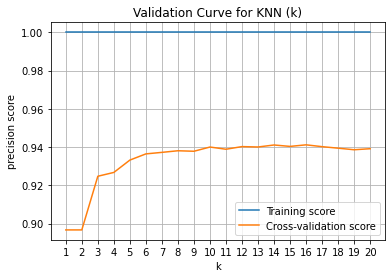

In [38]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="n_neighbors", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (k)')
plt.xlabel('k')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

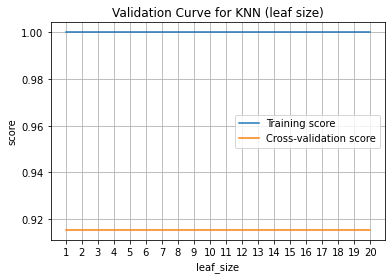

In [48]:
#Accuracy
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_2, 
                                             X_train, y_train, 
                                             param_name="leaf_size", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (leaf size)')
plt.xlabel('leaf_size')
plt.ylabel("score")
plt.legend(loc="best")
plt.grid()
plt.show()

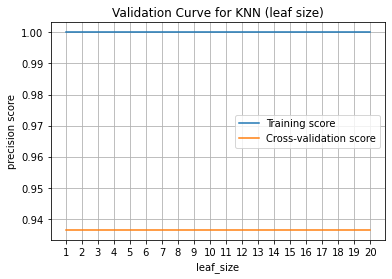

In [49]:
#precision
scorer = make_scorer(precision_score)
param_range = np.linspace(1, 20, 20).astype('int32')
train_scores, test_scores = validation_curve(KNN_classifier_2, 
                                             X_train, y_train, scoring = scorer,
                                             param_name="leaf_size", param_range=param_range, cv=5)

plt.figure()
plt.xticks(param_range)
plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation Curve for KNN (leaf size)')
plt.xlabel('leaf_size')
plt.ylabel("precision score")
plt.legend(loc="best")
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

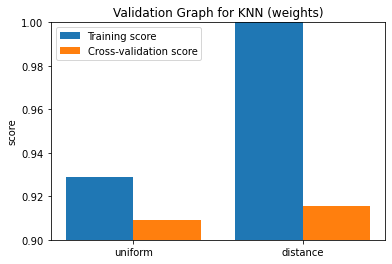

In [52]:
# Validation graph for KNN (weights)
weights = ['uniform', 'distance']
train_scores, test_scores = validation_curve(KNN_classifier_2,X_train, y_train, 
                                             param_name="weights", param_range=weights, 
                                             cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

x = ['uniform', 'distance']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.9, 1.0))
plt.ylabel('score')
plt.title('Validation Graph for KNN (weights)')
plt.show



<function matplotlib.pyplot.show(close=None, block=None)>

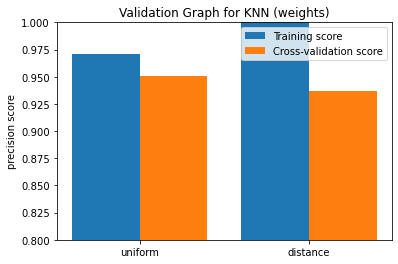

In [50]:
# precision 
scorer = make_scorer(precision_score)
weights = ['uniform', 'distance']
train_scores, test_scores = validation_curve(KNN_classifier_2,X_train, y_train, 
                                             param_name="weights", param_range=weights, 
                                             scoring = scorer,cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

data = [train_scores_mean[0], test_scores_mean[0], train_scores_mean[1],  test_scores_mean[1]]

x = ['uniform', 'distance']
data_train = [train_scores_mean[0],train_scores_mean[1]]
data_test = [test_scores_mean[0],test_scores_mean[1]]

bar_width = 0.4
index_train = np.arange(len(data_train))
index_test = index_train + bar_width

plt.bar(index_train, height = data_train, width = bar_width, color = 'C0', label = 'Training score')
plt.bar(index_test, height = data_test, width = bar_width, color = 'C1', label = 'Cross-validation score')

plt.legend(loc="best")
plt.xticks(index_train + bar_width/2, x)
plt.ylim((0.8, 1.0))
plt.ylabel('precision score')
plt.title('Validation Graph for KNN (weights)')
plt.show



# Algorithms Comparison

In [51]:
def plot_timing_curves(estimators, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), random_state =7):

    ax = plt.subplot()
    ax.grid()
    
    for estimator, name in estimators:
        print(name)
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, random_state= random_state)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)
        
        ax.semilogy(train_sizes, fit_times_mean, 'o-', label = name)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Fit times (s)")
        ax.legend(loc="best")

    plt.grid(True)
    return plt

In [52]:
classifiers = [(DT_classifier_2, "Decision Tree"),
               (NN_classifier_2, "Neural Network"),
               (BST_classifier_1, "Boosting"),
               (SVM_classifier_2, "SVM"),
               (KNN_classifier_2, "KNN"),
               ]

Decision Tree
Neural Network


D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Program Files\miniconda3\lib\site-packages\sklearn\neural

Boosting
SVM
KNN


<module 'matplotlib.pyplot' from 'D:\\Program Files\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

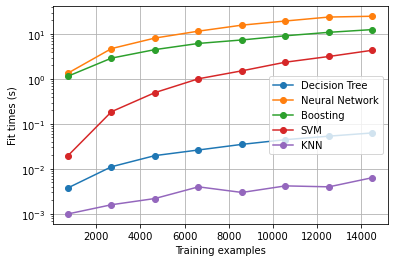

In [53]:
plot_timing_curves(classifiers
, X_train, y_train, "Fit Times vs Training Size")

In [54]:
import time

test_times = []
for classifier, name in classifiers:
    start_time1 = time.time()
    classifier.fit(X_train, y_train)
    end_time1 = time.time()
    start_time2 = time.time()
    classifier.predict(X_test)
    end_time2 = time.time()
    test_times.append((name, (end_time1-start_time1),end_time2-start_time2))
    
test_times

D:\Program Files\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


[('Decision Tree', 0.07395744323730469, 0.002998828887939453),
 ('Neural Network', 35.57447075843811, 0.021986961364746094),
 ('Boosting', 15.288774013519287, 0.08595061302185059),
 ('SVM', 7.973444700241089, 3.4510300159454346),
 ('KNN', 0.0019979476928710938, 3.4252707958221436)]

In [55]:
classifiers = ('Decision\nTree', 'Neural\nNetwork', 'Boosting', 'SVM', 'KNN')
x_pos = np.arange(len(classifiers))

<function matplotlib.pyplot.show(close=None, block=None)>

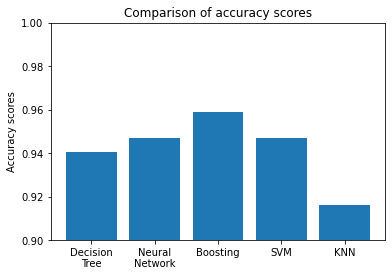

In [62]:
plt.bar(x_pos, height = best_accuracy)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('Accuracy scores')
plt.title('Comparison of accuracy scores')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

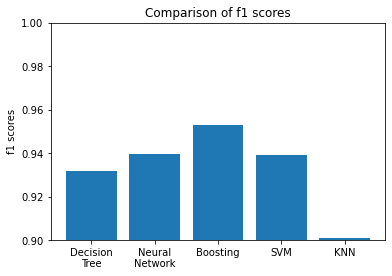

In [63]:
plt.bar(x_pos, height = best_f1)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('f1 scores')
plt.title('Comparison of f1 scores')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

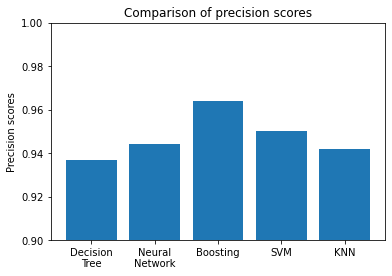

In [61]:
plt.bar(x_pos, height = best_precision)
plt.xticks(x_pos, classifiers)
plt.ylim((0.9, 1.0))
plt.ylabel('Precision scores')
plt.title('Comparison of precision scores')
plt.show